# Overfitted solution plot

In [1]:
#import deepxde as dde  # A complete problem: data+PDE+FCNN+optimiser
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata # interpolation

In [2]:
# Loading overfitted data
exact_data = np.load('overfitted_data.npz') # load true solution
keys = list(exact_data.keys()) # all keys in the dictionary
print(keys)

['nodes', 'Y']


In [3]:
# Overfitted data
nodes_overfit = exact_data[keys[0]] # nodal coordinates
Y_overfit = exact_data[keys[1]] # nodal temperature
#nodes_overfit = nodes_overfit[:,[0,2]]
print(np.shape(nodes_overfit), np.shape(Y_overfit))

(5800, 2) (5800, 1)


In [4]:
# True solution
exact_data = np.load('final_data.npz') # load true solution
keys = list(exact_data.keys()) # all keys in the dictionary
print(keys)

['nodes', 'temperature', 'boundary_nodal_coordinates', 'boundary_solution']


In [5]:
nodes = exact_data[keys[0]] # nodal coordinates
temperature = exact_data[keys[1]] # nodal temperature
nodes = nodes[:,[0,2]]
print(np.shape(nodes))
print(np.shape(temperature))

(5800, 2)
(5800, 1)


In [6]:
# Loading the predicted solution from the training dataset
# Link: https://github.com/lululxvi/deepxde/issues/17
# In test.dat, the first column is x coordinate, the second column is y coordinate, the 3rd column is y_true, the 4th column is y_pred.

data = np.genfromtxt('test.dat')
nodes_deepxde, y_pred = data[:,0:2], data[:,2]
print(np.shape(nodes_deepxde), np.shape(y_pred))

(2900, 2) (2900,)


In [7]:
# Create a meshgrid for plt.imshow()
ub = nodes.max(axis=0)
lb = nodes.min(axis=0)
print(ub)
print(lb)
n_points = 300
# Intepolation points
x = np.linspace(lb[0], ub[0], n_points)
y = np.linspace(lb[1], ub[1], n_points)
# Create meshgrid
X, Y = np.meshgrid(x,y)

[0.5 1. ]
[-0.5  0. ]


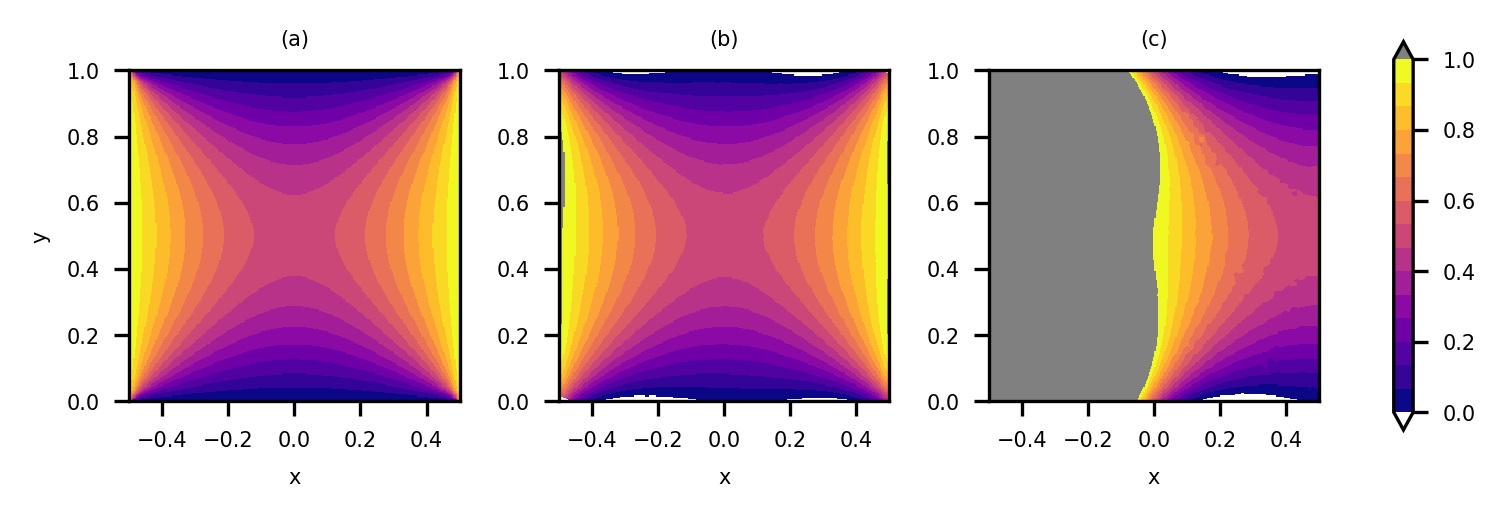

In [12]:
from pkgutil import extend_path


fig, ax = plt.subplots(1, 3,dpi=300)

# Interpolating the true solution on X,Y
data_deepxde = griddata(nodes, temperature.flatten(), (X, Y), method='cubic')
sc = ax[0].imshow(data_deepxde, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1)
sc.cmap.set_under('white')
sc.cmap.set_over('gray')

# Interpolating the deepxde solution
data_deepxde = griddata(nodes_deepxde, y_pred.flatten(), (X, Y), method='cubic')
sc = ax[1].imshow(data_deepxde, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1)
sc.cmap.set_under('white')
sc.cmap.set_over('gray')
# Interpolating the overfitted solution
data_deepxde = griddata(nodes_overfit, Y_overfit.flatten(), (X, Y), method='cubic')
sc = ax[2].imshow(data_deepxde, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1)

ax[0].set(xlabel='x', ylabel='y')
ax[1].set(xlabel='x', ylabel='')
ax[2].set(xlabel='x', ylabel='')

#fig.colorbar(sc1, ax=ax[0],shrink=0.5)
#fig.colorbar(sc2, ax=ax[1],shrink=0.5)
size =5

ax[0].xaxis.label.set_size(size)
ax[0].yaxis.label.set_size(size)
ax[1].xaxis.label.set_size(size)
ax[1].yaxis.label.set_size(size)
ax[2].xaxis.label.set_size(size)
ax[2].yaxis.label.set_size(size)

sc.cmap.set_under('white')
sc.cmap.set_over('gray')

ax[0].set_title('(a)', fontdict={'fontsize': size, 'fontweight': 'medium'})
ax[1].set_title('(b)', fontdict={'fontsize': size, 'fontweight': 'medium'})
ax[2].set_title('(c)', fontdict={'fontsize': size, 'fontweight': 'medium'})

# see this for tick label [numbers on axis] adjustment: https://stackoverflow.com/a/11386056/14598633
# default is 10
for col in range(3):
    ax[col].tick_params(axis='both', which='major', labelsize=size)

#fig.tight_layout()
# This one is better than tight_layout
# adjust width and height:https://stackoverflow.com/a/6541454/14598633
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.1   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)
cbar1 = fig.colorbar(sc, ax=ax.ravel().tolist(),shrink=0.35, extend="both")
cbar1.ax.tick_params(labelsize=size)



plt.savefig('overfittedplots//solutions.jpg', dpi = 500,bbox_inches='tight',transparent=True)